In [4]:
import random 

In [ ]:
# cf) https://docs.python.org/ko/3/library/random.html

In [ ]:
# [1] random() # 0이상 1미만의 숫자 중 랜덤 숫자 출력, random number between 0 and 1
for i in range(10):
  result = random.random() 
  print(result)

0.6770702957130823
0.26020301634993326
0.43278659868380687
0.5917484828215325
0.7385665370480423
0.7804020239477198
0.3920055875976949
0.31467023726617827
0.6956736474036349
0.6570512564476445


In [ ]:
# [2] randint(a,b) # a이상 b 이하의 랜덩 정수 출력
for i in range (10):
  result = random.randint(1,10)
  print(result)

9
3
3
4
10
6
8
9
7
9


In [ ]:
# [3] range()의 변형 --> randrange(a,b) a이상 b '미만'의 정수를 무작위 출력
for i in range(10):
  result = random.randrange(1,10)
  print(result)

'''
for i in range(10): # 0부터 9까지 (포함, 10이전)
for i in range (2, 10):# 2부터 10이전까지
for i in range (2, 11, 2): 2부터 11전까지 2씩 증가
'''

for i in range(10):
  result = random.randrange(2,11,2) # 2 4 6 8 10
  print(result)


4
4
8
2
6
8
6
10
10
8


In [ ]:
# [4] choice
data = ['a', 'b', 'c', 'd']
print(data)

result = random.choice(data)
print(result, type(result))

flag = random.choice([True, False])
print(flag)

['a', 'b', 'c', 'd']
b <class 'str'>
True


In [ ]:
# [5] sample (샘플링하다)
result = random.sample(data, 3)
print(result, type(result)) # <-- type 같이 출력하는 이유는 choice 함수랑 sample 함수랑 헷갈림 방지 @ 초기 stage

['b', 'c', 'a'] <class 'list'>


In [ ]:
# [6] shuffle
print(data)
random.shuffle(data)
print(data)

['a', 'b', 'c', 'd']
['b', 'd', 'a', 'c']


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial


In [6]:
# binomial pdf
def pdf_binomial(k,n,p):
  ''' docstring
  args :
    k(int) : number of success
    n(int) : total number of independent trials
    p(float) : probability
  return : 
    pd(float) : probability density of given k, n, p
  '''
  nck = factorial(n) / (factorial(k) * factorial(n-k))
  pd = nck * p**k * (1-p)**(n-k) # ** power
  return pd

[3.48678440e-11 1.62716605e-09 3.60688475e-08 5.04963865e-07
 5.00755833e-06 3.73897689e-05 2.18106985e-04 1.01783260e-03
 3.85928193e-03 1.20066549e-02 3.08170809e-02 6.53695655e-02
 1.14396740e-01 1.64261985e-01 1.91638983e-01 1.78863051e-01
 1.30420974e-01 7.16036722e-02 2.78458725e-02 6.83933711e-03
 7.97922663e-04]


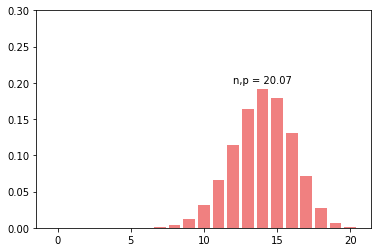

In [7]:
x = np.arange(21)
#pythonic
pd1 = np.array([pdf_binomial(k,20,0.7) for k in range(21)])
print(pd1)
'''
pd_ls = [ ]
for k in range(21):
  pd = pdf+_binomial(k, 0.7)
  pd_Is.append(pd_Is)
'''
plt.ylim(0, 0.3)
plt.text(12, 0.2, 'n,p = 20.07')
plt.bar(x, pd1, color = 'lightcoral')
plt.show()

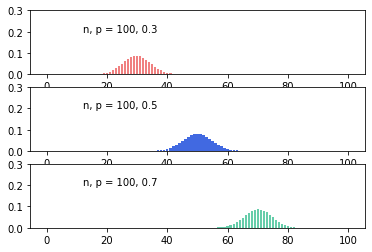

In [ ]:
N = 100
probs = [0.3, 0.5,0.7]
colors = ['lightcoral', 'royalblue', 'mediumaquamarine']
x= np.arange(N+1)
for i, p in enumerate(probs): # enumerate : print order of iteration
  pd = np.array([pdf_binomial(k,N,p) for k in range(N+1)])
  plt.subplot (3, 1, i+1)
  plt.ylim(0, 0.3)
  plt.text(12, 0.2, 'n, p = {}, {}'.format(N, p)) # the variables inside format() substitute {}
  plt.bar(x, pd, color = colors[i])

plt.show()

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial, exp

In [9]:
# Probability denisty function (Poisson distribution)
def poisson_dist(n, lamb):
  '''
    args:
    n(int) : number of times event occurs
    lambda (float) : expected value of occurences
  '''
  return (lamb**n) * exp(-lamb) / factorial(n)

In [ ]:
result = poisson_dist(80, 80)
print (result)

0.04455666577035095


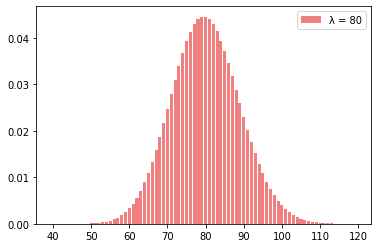

In [14]:
pd_ls = []
lamb = 80 # expected value
for n in range (int(0.5*lamb), int(1.5*lamb)): # from 0.5 lambda to 1.5 lamba, assuming probability for lambda out of range is close to 0
  prob = poisson_dist(n,lamb) # probability of occuring n times within given time frame
  pd_ls.append(prob)
 
x = np.arange (int(0.5*lamb), int(1.5*lamb)) # create x axis

pd_ls = np.array(pd_ls)

plt.bar(x, pd_ls, color = 'lightcoral')
plt.legend(['λ = {}'.format(lamb)])
plt.show()

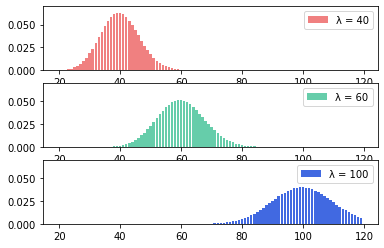

In [15]:
colors = ['lightcoral', 'mediumaquamarine', 'royalblue']
for i, lamb in enumerate([40, 60, 100]):
  plt.subplot(3, 1, i+1)

  x = np.arange(20, 120)
  pd = np.array([poisson_dist(n,lamb) for n in range (20, 120)])
  
  plt.ylim(0,0.07) # fix y axis range for better visual comparison
  plt.bar(x, pd, color = colors[i])
  plt.legend(['λ = {}'.format(lamb)])
plt.show()


  

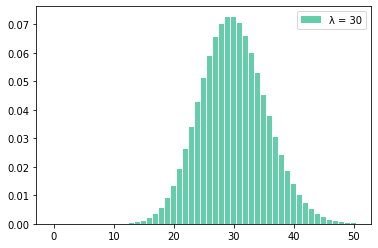

In [ ]:
lamb = 30
pd = np.array([poisson_dist(n,lamb) for n in range (0, 51)])
x = np.arange(0,51)
plt.bar (x, pd, color = 'mediumaquamarine')
plt.legend(['λ = {}'.format(lamb)])
plt.show()

In [ ]:
'''
알바생 p명
profit = (M*p) * R - Q*p
'''

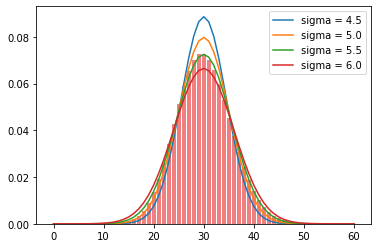

In [24]:
pd_ls = []
lamb = 30 # expected value
for n in range (0,61): # from 0 to 60 customers
  prob = poisson_dist(n,lamb) # probability of occuring n times within given time frame
  pd_ls.append(prob)
 
x = np.arange (0,61) # create x axis

pd_ls = np.array(pd_ls)

plt.bar(x, pd_ls, color = 'lightcoral')
plt.legend(['λ = {}'.format(lamb)])

def gaussian(x,mean, sigma):
  return (1/np.sqrt(2*np.pi * sigma**2)) * np.exp(-(x-mean)**2 / (2*sigma**2))

legends = []
for sigma in [4.5,5.0, 5.5, 6.0]:
  legends.append('sigma = {}'.format(sigma))
  plt.plot (x, gaussian(x, lamb, sigma))

plt.legend(legends)
plt.show()

In [37]:
def monte_carlo_simulation(num_workers):
  '''
  args
    num_workers (int) : number of workers hired by the restaurant
  '''
  lamb = 30
  M = 10 # number of customers one employee can serve
  Q = 8 # wage of one employee
  R = 30 # price of ne order of food

  cnt_serving = M * num_workers

  sales = 0
  loss = num_workers * Q
  

  num_customers = int(np.random.normal (lamb, 5.5))
  for i in range (num_customers):
    if cnt_serving >=0:
      sales += R
      cnt_serving -= 1
      
  profit = sales - loss

  return profit



In [39]:
profit_1 = monte_carlo_simulation(5)
profit_2 = monte_carlo_simulation(5)
print(profit_1, profit_2)

920 1070


In [41]:
import pandas as pd


    0    1    2    3     4    5     6     7    8    9    ...  91   92   93   \
0    30  322  614  816   718  890   882   934  866  828  ...  172  134   66   
1    30  322  614  786   568  830   882   964  956  858  ...  352  164   36   
2    30  322  614  846  1018  920   912  1084  866  948  ...  112  134    6   
3    30  322  614  636   838  800   582   874  716  948  ...  232  194 -144   
4    30  322  614  906   778  860   792   724  776  828  ...  112  134   96   
..  ...  ...  ...  ...   ...  ...   ...   ...  ...  ...  ...  ...  ...  ...   
95   30  322  614  906   778  650   822   964  986  828  ...  112   74 -114   
96   30  322  614  786   838  980   762   904  986  828  ...   82  134  216   
97   30  322  614  906   898  350  1122   694  776  528  ...   52  194  306   
98   30  322  554  486   778  650   582   634  746  618  ...   22  104  216   
99   30  322  614  906   388  770   912   724  506  678  ...   82  374  156   

    94   95   96   97   98   99   100  
0    -2 -19

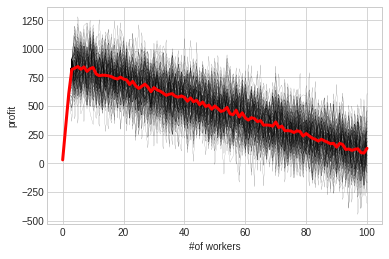

optimal number of workers to hire : 5, expected profit : 845.3


In [45]:
final_result = []
max_num_workers = 100
num_simulations = 100

for i in range (num_simulations):
  result = []
  for num_workers in range(0, max_num_workers +1):
    profit = monte_carlo_simulation(num_workers)
    result.append(profit)
  final_result.append(result)

plt.style.use('seaborn-whitegrid')
output = pd.DataFrame(final_result)
print(output)

axis = output.T.plot(lw = 0.1, color = 'black', legend = False)
axis.set_xlabel('#of workers')
axis.set_ylabel('profit')

output.mean().plot(lw = 3, color = 'red', legend = False)
plt.show()

data = output.mean ()
max_profit = data.max()
optimal_num_workers = data.argmax()
print('optimal number of workers to hire : {}, expected profit : {}'.format(optimal_num_workers, max_profit))